### Gini Impurity

Gini impurity is a standard measure of misclassification. It is used in decision trees to measure the homogeneity of groups and therefore the quality of a point used to split our tree. 

From Wikipedia:

>Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be computed by summing the probability 

$p_{i}$ of an item with label ${i}$ being chosen times the probability $1-p_{i}$ of a mistake in categorizing that item. 

>It reaches its minimum (zero) when all cases in the node fall into a single target category.

It's important not to confuse gini impurity with gini coefficient- though both can be used in deicison trees in some cases. 

To compute the Gini impurity for a set of items with $J$ classes, suppose $i \in {1,2,...,J}$, let $p_{1}$ be the fraction of items labeled with class $i$ in the set.

$$I_{G}(p) = \sum_{i=1}^J p_{i}(1-p_{i}) = \sum_{i=1}^J p_{i}(1-p_{i}^{2}) = \sum_{i=1}^J p_{i} - \sum_{i=1}^J p_{i}^{2}= 1 - \sum_{i=1}^J p_{i}^{2} = \sum_{i\ne k}p_{i}p_{k}$$


##### Psuedo Code for Gini Impurity

1. Determine the probability for each class in the group to be randomly chosen 
2. Multiply each class together
3. Determine the probability of a every other class be assign 
4. 1-score * (group size/total size) 

In [149]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import math
#add seaborn to make better the visualizations
from IPython.display import display

headers = ['index','refractive index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium', 'barium', 'iron', 'type of glass']
df = pd.read_csv('glass_data.csv', names = headers)



2    3
6    2
1    2
7    1
5    1
3    1
Name: type of glass, dtype: int64
2    6
3    2
7    1
5    1
Name: type of glass, dtype: int64


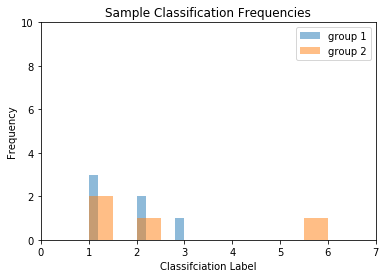

In [161]:
size_of_sample = 20
df_sample = df.sample(size_of_sample)
split_point = int(math.floor(size_of_sample/2))
labels = [1, 2, 3, 4, 5, 6, 7]
groups = [df_sample.iloc[:split_point, :], df_sample.iloc[split_point:, :]]

g_labels = [groups[0].iloc[:, -1].value_counts(), groups[1].iloc[:, -1].value_counts()]

def gini_impurity(groups):
    n_samples = sum([len(group) for group in groups]) #add float 
    gini = 0.0
    for group in groups:
        group_size = float(len(group))
        if group_size == 0:
            continue
        score = sum(group.iloc[:, -1].value_counts().map(lambda p: (p/group_size)* (p/group_size)))
        gini += (1.0 - score) * (group_size / n_samples)
    return gini
    
gini = gini_impurity(groups)
print(g_labels[0])
print(g_labels[1])
bins = np.arange(7) #[0, 1, 2, 3, 4, 5, 6, 7]
#probably have to muck with the labels that I'm passing in
plt.hist(g_labels[0], alpha = 0.5, label='group 1', align='mid')
plt.hist(g_labels[1], alpha = 0.5, label='group 2', align='mid')
plt.legend(loc='upper right')
plt.title('Sample Classification Frequencies')
plt.xlabel('Classifciation Label')
plt.ylabel('Frequency')
plt.ylim([0, 10])
plt.xlim([0, 7])
plt.show()